In [48]:
%pip install seaborn

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [50]:
df = pd.read_csv("ocean_climate.csv")
df.head()

,Date,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave
0,2015-01-01,Red Sea,20.0248,38.4931,29.47,8.107,NaN,106,False
1,2015-01-07,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,False
2,2015-01-14,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,False
3,2015-01-20,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,Medium,94,False
4,2015-01-27,Galápagos,-0.8805,-90.9769,28.60,7.977,NaN,110,False


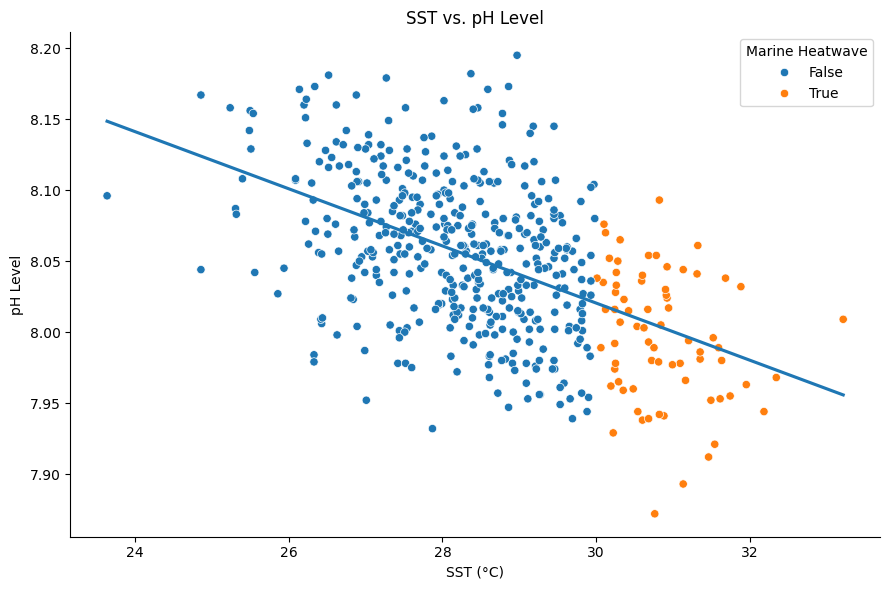

In [62]:
sns.lmplot(
    data=df,
    x='SST (°C)',
    y='pH Level',
    scatter_kws={'alpha': 0.6, 's': 10},
    markers='o',
    height=6,
    aspect=1.5,
    legend=True,
    ci=None
)
sns.scatterplot(data=df, x='SST (°C)', y='pH Level', hue='Marine Heatwave')

plt.title('SST vs. pH Level')
plt.tight_layout()
plt.show()

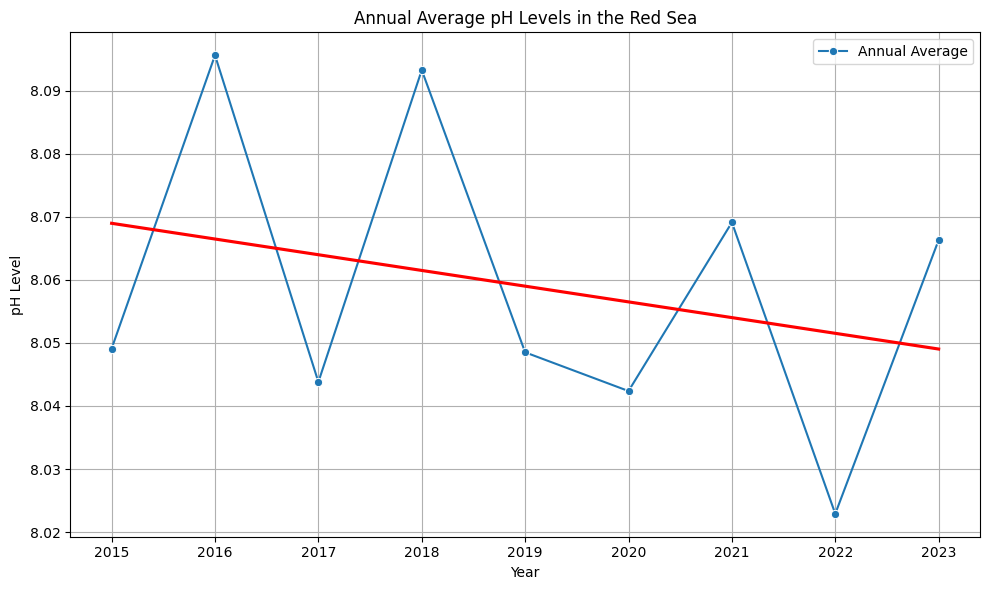

In [53]:
df['Date'] = pd.to_datetime(df['Date'])

red_sea_df = df[df['Location'] == 'Red Sea'].copy()

red_sea_df['Year'] = red_sea_df['Date'].dt.year
annual_ph = red_sea_df.groupby('Year')['pH Level'].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(data=annual_ph, x='Year', y='pH Level', marker='o', label='Annual Average')

sns.regplot(
    data=annual_ph,
    x='Year',
    y='pH Level',
    scatter=False,
    ci=None,
    line_kws={'color': 'red', 'label': 'Trend Line'}
)

plt.title('Annual Average pH Levels in the Red Sea')
plt.xlabel('Year')
plt.ylabel('pH Level')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

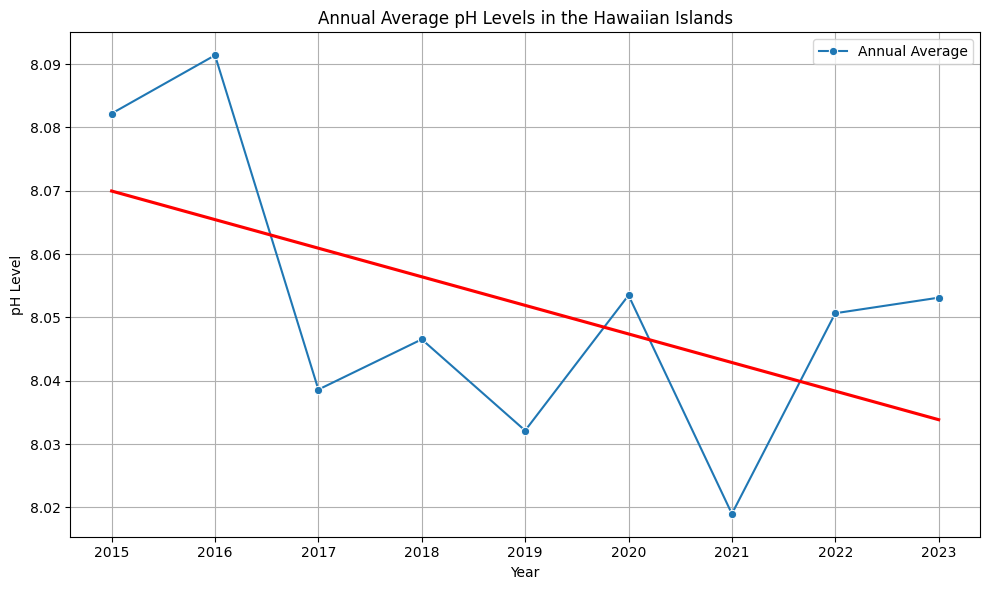

In [54]:
df['Date'] = pd.to_datetime(df['Date'])

red_sea_df = df[df['Location'] == 'Hawaiian Islands'].copy()

red_sea_df['Year'] = red_sea_df['Date'].dt.year
annual_ph = red_sea_df.groupby('Year')['pH Level'].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(data=annual_ph, x='Year', y='pH Level', marker='o', label='Annual Average')

sns.regplot(
    data=annual_ph,
    x='Year',
    y='pH Level',
    scatter=False,
    ci=None,
    line_kws={'color': 'red', 'label': 'Trend Line'}
)

plt.title('Annual Average pH Levels in the Hawaiian Islands')
plt.xlabel('Year')
plt.ylabel('pH Level')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

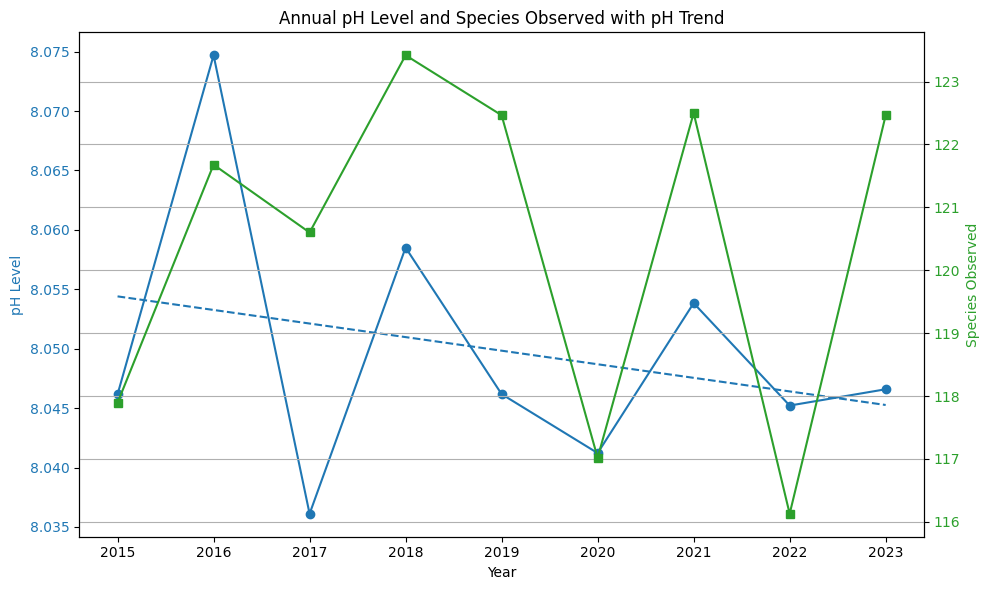

In [55]:
from scipy.stats import linregress

df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year

global_annual = df.groupby('Year').agg({
    'pH Level': 'mean',
    'Species Observed': 'mean'
}).reset_index()

slope_ph_global, intercept_ph_global, _, _, _ = linregress(global_annual['Year'], global_annual['pH Level'])
global_annual['pH Trend'] = intercept_ph_global + slope_ph_global * global_annual['Year']

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('pH Level', color='tab:blue')
ax1.plot(global_annual['Year'], global_annual['pH Level'], color='tab:blue', marker='o', label='pH Level')
ax1.plot(global_annual['Year'], global_annual['pH Trend'], color='tab:blue', linestyle='--', label='pH Trend')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Species Observed', color='tab:green')
ax2.plot(global_annual['Year'], global_annual['Species Observed'], color='tab:green', marker='s', label='Species Observed')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('Annual pH Level and Species Observed with pH Trend')
plt.grid(True)
fig.tight_layout()
plt.show()